In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Separando o dataset de treinamento do dataset de teste
<text>
Os dados foram separados colocando 70% do dataset aleatoriamente como treinamento, e o que sobra vai para o teste.
</text>

In [20]:
df = pd.read_csv('covid_Einstein.csv')

#separando o dataframe de testes e o de treinamento
X = df.loc[:, df.columns != 'Exame']
y =  df['Exame']

print(X.shape, y.shape)

(120, 8) (120,)


# Criando as árvores de decisão

<text>
Uma das árvores utiliza o splitter aleatório enquanto a outra usa o aprimorado.
</text>

<text> 
Foi usado um cross-validation "splittando" os dados em 10 iterações.
</text>

In [35]:
forest_default = RandomForestClassifier(random_state=10)
forest_best = RandomForestClassifier(n_estimators= 200, random_state=10, max_depth=4)

scores_default = cross_val_score(forest_default, X, y, cv=10)
scores_best = cross_val_score(forest_best, X, y, cv=10)


# Previsão
<text>Agora vamos checar os valores de acurácia que resultaram dos 10 splits de cada árvore, bme como a acurácia de cada uma  </text>

In [36]:
scores_default

array([0.91666667, 0.75      , 0.91666667, 0.66666667, 0.83333333,
       0.66666667, 0.91666667, 0.75      , 0.75      , 0.91666667])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f09b60dc970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f09b5f7cd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f09b60dc1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f09b6002c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f09b60b2a00>],
 'means': []}

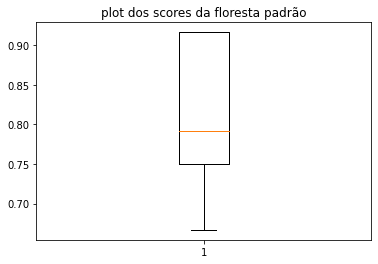

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_title('plot dos scores da floresta padrão')
ax1.boxplot(scores_default)

In [38]:
scores_best

array([0.91666667, 0.75      , 0.91666667, 0.66666667, 0.83333333,
       0.75      , 0.91666667, 0.75      , 0.75      , 0.91666667])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f09b5e180d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f09b5e18790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f09b5e09d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f09b5e18e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f09b5e231f0>],
 'means': []}

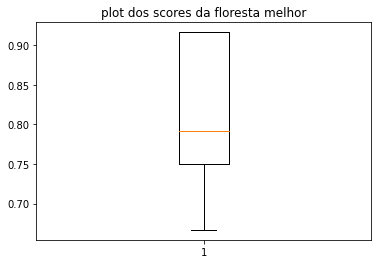

In [39]:
fig1, ax1 = plt.subplots()
ax1.set_title('plot dos scores da floresta melhor')
ax1.boxplot(scores_best)

# previsão para a árvore padrão

In [40]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_default.mean(), scores_default.std() * 2))

Accuracy: 0.81 (+/- 0.20)


# Previsão para árvore melhor

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_best.mean(), scores_best.std() * 2))

Accuracy: 0.82 (+/- 0.18)
